In [1]:
import sys
path1 = 'C:/Users/dell/Desktop/Graduate School Study/Spring 2020/Big Data in Finance/Part2/liramota-big_data2020/homeworks/hm_ii'
path2 = 'C:/Users/dell/Desktop/Graduate School Study/Spring 2020/Big Data in Finance/Part2/liramota-big_data2020/homeworks/hm_ii/liramota-fire_pytools'
sys.path.append(path1)
sys.path.append(path2)

In [3]:
# %% Packages
import pandas as pd

import data_import.stock_annual as stock_annual
import data_import.stock_monthly as stock_monthly
#import homeworks.hm_ii.data_import.stock_annual as stock_annual
#import homeworks.hm_ii.data_import.stock_monthly as stock_monthly

# Packages from fire_pytools
from utils.monthly_date import *

from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios

desired_width = 10
pd.set_option('display.width', desired_width)
idx = pd.IndexSlice

In [4]:
mdata = pd.read_pickle('C:/Users/dell/Desktop/Graduate School Study/Spring 2020/Big Data in Finance/Part2/liramota-big_data2020/homeworks/hm_ii/output/stock_monthly1.pkl')


In [5]:
# %% Packages
import pandas as pd

import data_import.stock_annual as stock_annual
import data_import.stock_monthly as stock_monthly
#import homeworks.hm_ii.data_import.stock_annual as stock_annual
#import homeworks.hm_ii.data_import.stock_monthly as stock_monthly

# Packages from fire_pytools
from utils.monthly_date import *

from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios

desired_width = 10
pd.set_option('display.width', desired_width)
idx = pd.IndexSlice

# %% Set Up

# %% Download Data
# Monthly Data
mdata = pd.read_pickle('C:/Users/dell/Desktop/Graduate School Study/Spring 2020/Big Data in Finance/Part2/liramota-big_data2020/homeworks/hm_ii/output/stock_monthly1.pkl')

# Annual Data
adata = pd.read_pickle('C:/Users/dell/Desktop/Graduate School Study/Spring 2020/Big Data in Finance/Part2/liramota-big_data2020/homeworks/hm_ii/output/stock_annual.pkl')

# Set names
adata.drop(columns='inv', inplace=True)
adata.rename(columns={'mesum_june': 'me', 'inv_gvkey': 'inv'}, inplace=True) #inv_permco

# %% Create Filters
# shrcd must be (10,11)
# ---------------------
print('Data deleted due to shrcd: %f' % np.round((1-adata.shrcd.isin([10, 11]).mean())*100, 2))
sort_data = adata[adata.shrcd.isin([10, 11])].copy()

# exchcd must be (1, 2, 3)
# ------------------------
print('Data deleted due to exchcd: %f' % np.round((1-sort_data.exchcd.isin([1, 2, 3]).mean())*100, 2))
sort_data = sort_data[sort_data.exchcd.isin([1, 2, 3])]

#del adata, mdata

# %% Portfolio Sorts
## ME X BEME
# notice that the way we defined beme or beme is null if be<=0
sample_filters = ((sort_data.me > 0) &
                  (sort_data.mesum_dec > 0) &
                  (sort_data.beme.notnull()))

beme_sorts = sort_portfolios(data=sort_data[sample_filters],
                             quantiles={'me': [0.5], 'beme': [0.3, 0.7]},
                             id_variables=['rankyear', 'permno', 'exchcd'],
                             exch_cd=[1]
                             )

# TODO: ME X OP
sample_filters2 = ((sort_data.me > 0) &
                  (sort_data.mesum_dec > 0) &
                  (sort_data.op.notnull()))

opbe_sorts = sort_portfolios(data=sort_data[sample_filters2],
                             quantiles={'me': [0.5], 'opbe': [0.3, 0.7]},
                             id_variables=['rankyear', 'permno', 'exchcd'],
                             exch_cd=[1]
                             )

# TODO: ME X INV
sample_filters3 = ((sort_data.me > 0) &
                  (sort_data.mesum_dec > 0) &
                  (sort_data.inv.notnull()))

inv_sorts = sort_portfolios(data=sort_data[sample_filters3],
                             quantiles={'me': [0.5], 'inv': [0.3, 0.7]},
                             id_variables=['rankyear', 'permno', 'exchcd'],
                             exch_cd=[1]
                             )

# TODO: ME X ret_11_1 (sorts at each month - id_variables=['date', 'permno', 'exchcd'])
sample_filters4 = ((sort_data.me > 0) &
                  (sort_data.mesum_dec > 0) &
                  (sort_data.ret_11_1.notnull()))

meret_sorts = sort_portfolios(data=sort_data[sample_filters],
                             quantiles={'me': [0.5], 'ret_11_1': [0.3, 0.7]},
                             id_variables=['date', 'permno', 'exchcd'],
                             exch_cd=[1]
                             )

Data deleted due to shrcd: 23.320000
Data deleted due to exchcd: 1.560000
NYSE breakpoints were calculated for me.
Stocks were sorted according to breakpoints, starting in 1926.0
NYSE breakpoints were calculated for beme.
Stocks were sorted according to breakpoints, starting in 1926.0
NYSE breakpoints were calculated for me.
Stocks were sorted according to breakpoints, starting in 1951.0
NYSE breakpoints were calculated for opbe.
Stocks were sorted according to breakpoints, starting in 1951.0
NYSE breakpoints were calculated for me.
Stocks were sorted according to breakpoints, starting in 1952.0
NYSE breakpoints were calculated for inv.
Stocks were sorted according to breakpoints, starting in 1952.0


### Monthly

In [ ]:
#Q1

In [7]:
dec2019 = mdata[(mdata['date'] >= '2019-12-01') & (mdata['date'] <= '2019-12-31')]

In [10]:
len(dec2019['permno'].unique())

7595

In [12]:
dec2019['ret_11_1'].agg(['mean','min','max'])

mean     0.153157
min     -0.999424
max     12.960993
Name: ret_11_1, dtype: float64

In [13]:
dec2019.isnull().sum(axis=0)

permno             0
date               0
dlret           7543
dlretx          7543
exchcd             0
naics             39
permco             0
prc               61
ret               62
shrcd              0
shrout             0
siccd             25
ticker             0
retadj            10
me                61
mesum_permco      46
mesum           7595
days_diff          0
melag              0
ret_11_1          43
rankyear           0
dtype: int64

In [14]:
#Q2

In [16]:
import warnings
warnings.filterwarnings("ignore")
dec2019.sort_values(['ret_11_1'],ascending=False,inplace=True)
dec2019.head(10)[['permno','ticker','ret_11_1']]

,permno,ticker,ret_11_1
256135,15831,AXSM,12.960993
311315,17958,CNST,10.610972
309894,17880,EVER,7.423445
1332245,89289,SSI,5.486487
803629,80069,ARWR,4.878422
311797,17973,PRVB,4.627119
274716,16524,HEBT,4.464417
285336,16932,ROKU,4.234008
258608,15914,WKHS,4.208334
244193,15496,CFMS,4.195531


In [17]:
#Q3

In [18]:
dec2019.sort_values(['ret_11_1'],ascending=True,inplace=True)
dec2019.head(10)[['permno','ticker','ret_11_1']]

,permno,ticker,ret_11_1
1661992,92571,CEI,-0.999424
264775,16112,VIVE,-0.991961
989963,84302,DPW,-0.988659
202036,14610,INPX,-0.986897
273337,16469,MTFB,-0.985842
266970,16173,WTRH,-0.965919
239247,15375,JAGX,-0.961913
309511,17854,NAKD,-0.960798
239471,15381,OPGN,-0.953462
1442143,90298,TOPS,-0.953426


### Annual

In [19]:
#Q3

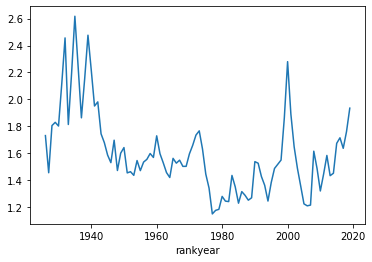

In [23]:
df_value_growth = pd.merge(adata[['rankyear','be','me','permno']],beme_sorts,on = ['rankyear','permno'])
cal_value_spread = df_value_growth.groupby(['rankyear','bemeportfolio']).sum()
cal_value_spread['log_ratio'] = np.log(cal_value_spread['be'] / cal_value_spread['me'])
cal_value_spread.reset_index(inplace = True)
cal_value_spread['spread'] = cal_value_spread['log_ratio'].diff(2)
res_value_spread = cal_value_spread[cal_value_spread['bemeportfolio'] == 'beme3']
res_value_spread.set_index(["rankyear"], inplace=True)
res_value_spread['spread'].plot()

In [24]:
#Q4

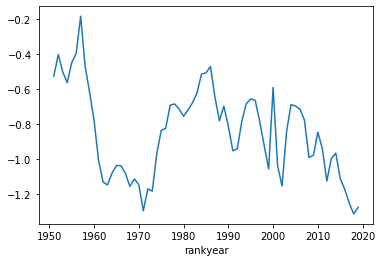

In [29]:
df_opbe = pd.merge(adata[['rankyear','be','me','permno']],opbe_sorts,on = ['rankyear','permno'])
cal_profit_spread = df_opbe.groupby(['rankyear','opbeportfolio']).sum()
cal_profit_spread['log_ratio'] = np.log(cal_profit_spread['be'] / cal_profit_spread['me'])
cal_profit_spread.reset_index(inplace = True)
cal_profit_spread['spread'] = cal_profit_spread['log_ratio'].diff(2)
res_profit_spread = cal_profit_spread[cal_profit_spread['opbeportfolio'] == 'opbe3']
res_profit_spread.set_index(["rankyear"], inplace=True)
res_profit_spread['spread'].plot()

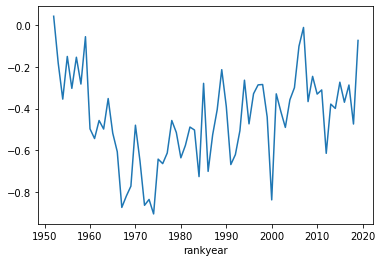

In [33]:
df_inv = pd.merge(adata[['rankyear','be','me','permno']],inv_sorts,on = ['rankyear','permno'])
cal_inv_spread  = df_inv.groupby(['rankyear','invportfolio']).sum()
cal_inv_spread ['log_ratio'] = np.log(cal_inv_spread ['be'] / cal_inv_spread ['me'])
cal_inv_spread .reset_index(inplace = True)
cal_inv_spread ['spread'] = cal_inv_spread ['log_ratio'].diff(2)
res_inv_spread = cal_inv_spread [cal_inv_spread ['invportfolio'] == 'inv3']
res_inv_spread.set_index(["rankyear"], inplace=True)
res_inv_spread['spread'].plot()